### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load files

In [2]:
# !! Important note regarding this code: Directories for files need to be changed first!

# URLs Rodrigo
# listingsUpdate = pd.read_csv("C:\\Users\\rodri\\OneDrive\\Documentos\\GitHub\\Project-Data-Science\\listing_update\\listing_update.csv", sep='\t')
# reviews= pd.read_csv("C:\\Users\\rodri\\OneDrive - ISEG\\iseg 22092021\\Iseg\\Master\\2semester\\Programing for Data Science\\trabalho\\reviews.csv.gz", compression= "gzip")

# URLs Rosanna
listingsUpdate = pd.read_csv("C:\\Users\\Rosan\\Documents\\GitHub\\listing_update\\listing_update.csv", sep='\t')

------------

# Plots for file "listingsUpdate"

### Bar Chart: Top 10 Hosts with most Listings

Text(0, 0.5, 'No. of Listings')

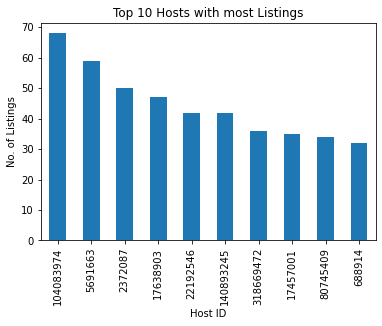

In [5]:
barPlot_top10Hosts = listingsUpdate['host_id'].value_counts().head(10).plot.bar(title='Top 10 Hosts with most Listings') # Count number of listings per hosts, filter for top 10 and create a bar plot
barPlot_top10Hosts.set_xlabel("Host ID") # define label for x-axis
barPlot_top10Hosts.set_ylabel("No. of Listings") # define label for y-axis

### Horizontal bar chart: Top 5 Neighbourhoods of Listings

Text(0, 0.5, 'Neighbourhood')

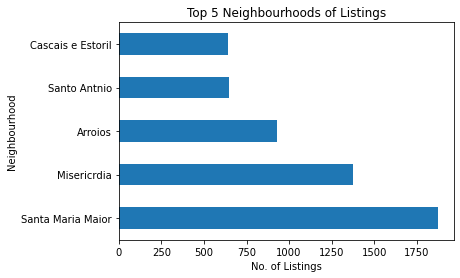

In [6]:
barPlotHor_top5Neighbourhoods = listingsUpdate['neighbourhood'].value_counts().head(5).plot.barh(title='Top 5 Neighbourhoods of Listings') # Count number of times neighbourhood appears for a listing, filter for top 5 and create a horizontal bar plot
barPlotHor_top5Neighbourhoods.set_xlabel("No. of Listings") # define label for x-axis
barPlotHor_top5Neighbourhoods.set_ylabel("Neighbourhood") # define label for y-axis

### Pie Chart: Maximum capacity of Listings

Text(0, 0.5, '')

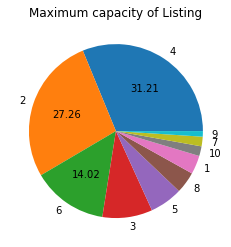

In [11]:
def autopct(pct): 
    return ('%.2f' % pct) if pct > 10 else '' # only show the label when it's > 10%
pieChart_Accommodates = listingsUpdate['accommodates'].value_counts().head(10).plot.pie(autopct= autopct,title='Maximum capacity of Listing') # Count number of times a maximum capacity appears for a listing, filter for top 10 and create a pie chart
pieChart_Accommodates.set_ylabel("") # define label for y-axis (=no label)

### Pie Chart: Review Rating above 4

Text(0, 0.5, '')

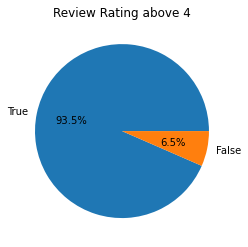

In [12]:
ReviewScoreAbove4 = listingsUpdate['review_scores_rating'] > 4 # Return "True" when ReviewScore > 4 and "False" when ReviewScore <= 4 
pieChart_ReviewScoreAbove4 = ReviewScoreAbove4.value_counts("True").plot.pie(autopct='%1.1f%%',title='Review Rating above 4') # Count number of times "True" appears for a listing and create a pie chart
pieChart_ReviewScoreAbove4.set_ylabel("") # define label for y-axis (=no label)

## Boxplots

In [15]:
# Count the number of times a price appears as a listing price
listingsUpdate["price"].value_counts()

60     390
50     377
65     295
70     290
80     274
      ... 
747      1
212      1
228      1
332      1
567      1
Name: price, Length: 411, dtype: int64

In [16]:
# Show the main statistics of data
listingsUpdate["price"].describe()

count    10421.000000
mean        91.330487
std        149.577024
min          8.000000
25%         49.000000
50%         68.000000
75%        100.000000
max      11499.000000
Name: price, dtype: float64

### Boxplot for prices of the listings

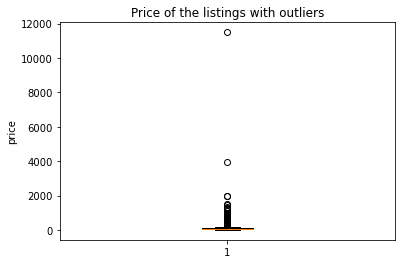

In [10]:
# Create Boxplot for prices of listings
fig= plt.figure()

BoxplotPrice= fig.add_subplot(111)
BoxplotPrice.boxplot(listingsUpdate["price"])

BoxplotPrice.set_ylabel("price")
BoxplotPrice.set_title("Price of the listings with outliers")

plt.show()


Conclusion: This boxplot shows clearly some outliers.

In [17]:
# Remove outliers
PriceQuantileLow = listingsUpdate["price"].quantile(0.01)
PriceQuantileHigh = listingsUpdate["price"].quantile(0.95)
listingsUpdateOut= listingsUpdate[(listingsUpdate["price"]< PriceQuantileHigh) & (listingsUpdate["price"] >PriceQuantileLow)]

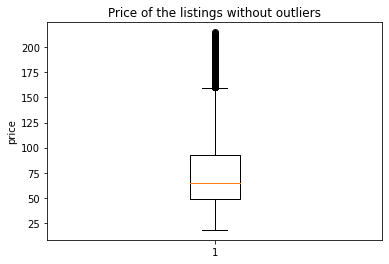

In [18]:
# Boxplot for prices of listing without outliers
fig1= plt.figure()

BoxplotPriceOut= fig1.add_subplot(111)
BoxplotPriceOut.boxplot(listingsUpdateOut["price"])

BoxplotPriceOut.set_ylabel("price")
BoxplotPriceOut.set_title("Price of the listings without outliers")

plt.show()

In [31]:
# Show the main statistics of data without outliers
listingsUpdateOut["price"].describe()

count    9779.000000
mean       75.059515
std        38.758409
min        18.000000
25%        49.000000
50%        65.000000
75%        93.000000
max       215.000000
Name: price, dtype: float64

In [19]:
# Show dataframe "listingsUpdate"
listingsUpdate

,Unnamed: 0,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,host_is_superhost,nr_of_bathrooms,bedrooms,accommodates,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1,25659,107347,Lisboa,Santa Maria Maior,38.712410,-9.127060,4,50,2,...,1,1.0,1.0,3,4.81,4.88,4.97,4.97,4.88,4.82
1,2,29248,125768,Lisboa,Santa Maria Maior,38.710820,-9.127190,4,60,5,...,0,1.0,1.0,4,4.56,4.38,4.65,4.74,4.82,4.61
2,3,29396,126415,Lisboa,Santa Maria Maior,38.711560,-9.129870,4,60,2,...,1,1.0,1.0,4,4.80,4.82,4.88,4.91,4.88,4.75
3,4,29720,128075,Lisboa,Estrela,38.711080,-9.159790,4,957,2,...,0,8.0,9.0,16,4.92,4.84,4.97,4.97,4.83,4.60
4,5,29915,128890,Lisboa,Avenidas Novas,38.745710,-9.152640,4,50,5,...,1,1.0,1.0,3,4.68,4.88,4.79,4.74,4.67,4.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10416,18401,53414853,248190255,Lisboa,Santa Maria Maior,38.712320,-9.127970,4,83,1,...,0,1.0,2.0,4,5.00,5.00,5.00,5.00,5.00,5.00
10417,18416,53458315,350537779,Lisboa,Belm,38.700360,-9.204530,2,28,1,...,0,4.0,1.0,1,5.00,5.00,5.00,5.00,5.00,5.00
10418,18431,53487620,228781046,Loures,Sacavm e Prior Velho,38.792185,-9.121564,2,27,1,...,0,1.0,1.0,1,5.00,5.00,5.00,5.00,5.00,5.00
10419,18436,53491572,99481117,Cascais,Cascais e Estoril,38.695650,-9.428440,4,119,3,...,1,1.0,2.0,4,5.00,5.00,5.00,5.00,5.00,5.00


## Other charts

Text(0.5, 0, 'Host')

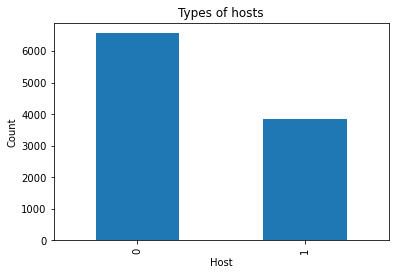

In [15]:
# Bar Chart: Compare the number of super hosts(1) with normal hosts(0)
HostType = listingsUpdate["host_is_superhost"].value_counts().plot.bar(title="Types of hosts")
HostType.set_ylabel("Count")
HostType.set_xlabel("Host")

Text(0, 0.5, '')

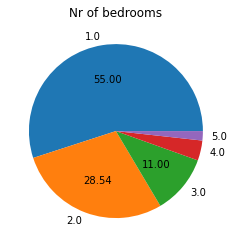

In [16]:
# Pie Chart: Show number of bedrooms of listings
Bedroompiechart=listingsUpdate["bedrooms"].value_counts().head(5).plot.pie(autopct= autopct,title='Nr of bedrooms')
Bedroompiechart.set_ylabel("")

------------

# Plot for file "reviews"

In [17]:
# Group reviews df by "listing_id"
reviewsListing= reviews.groupby("listing_id")

In [18]:
# Count amount of reviews per Listing and store top 10 in variable "reviewsListing"
reviewsListing= reviewsListing["comments"].count().reset_index().sort_values("comments", ascending=False).head(10)

### Pie Chart: Top 10 Listings with most reviews

Text(0.5, 0, 'Id')

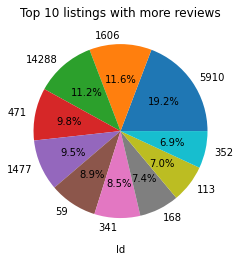

In [19]:
reviewsListingPie = reviewsListing.plot(kind='pie', y='comments', autopct="%1.1f%%",
                                 title='Top 10 listings with more reviews')
reviewsListingPie.get_legend().remove()
reviewsListingPie.set_ylabel("")
reviewsListingPie.set_xlabel("Id")